In [59]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
base_path = '../dataset'
print(os.listdir(base_path))

['sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [3]:
label_df = pd.read_csv(base_path+'/train.csv')
submission_df = pd.read_csv(base_path+'/sample_submission.csv')
label_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [4]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
Image    25361 non-null object
Id       25361 non-null object
dtypes: object(2)
memory usage: 396.3+ KB


In [5]:
label_df['Id'].describe()

count         25361
unique         5005
top       new_whale
freq           9664
Name: Id, dtype: object

totle number is 25361
new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
Name: Id, dtype: int64


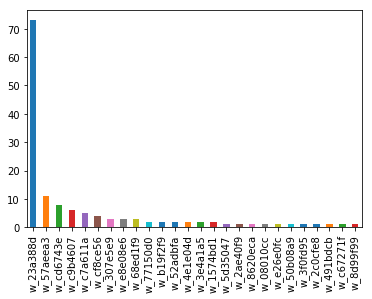

In [47]:
label_counts = label_df['Id'].value_counts()#[1:200].plot(kind='bar')
print('totle number of whales is',label_counts.sum())
print(label_counts[:10])
label_counts[1::200].plot(kind = 'bar')

In [61]:
label_counts_less1 = [i for i in label_counts if i < 4]
print('鲸鱼数量低于4有{}只，占比{}%, '.format(len(label_counts_less1),100*len(label_counts_less1)/label_counts.sum()))
print('ID为new_whale的鲸鱼数量为{}只，占比{}%, '.format(label_counts[0],100*label_counts[0]/label_counts.sum()))

鲸鱼数量低于4有3926只，占比15.48046212688774%, 
ID为new_whale的鲸鱼数量为9664只，占比38.10575292772367%, 


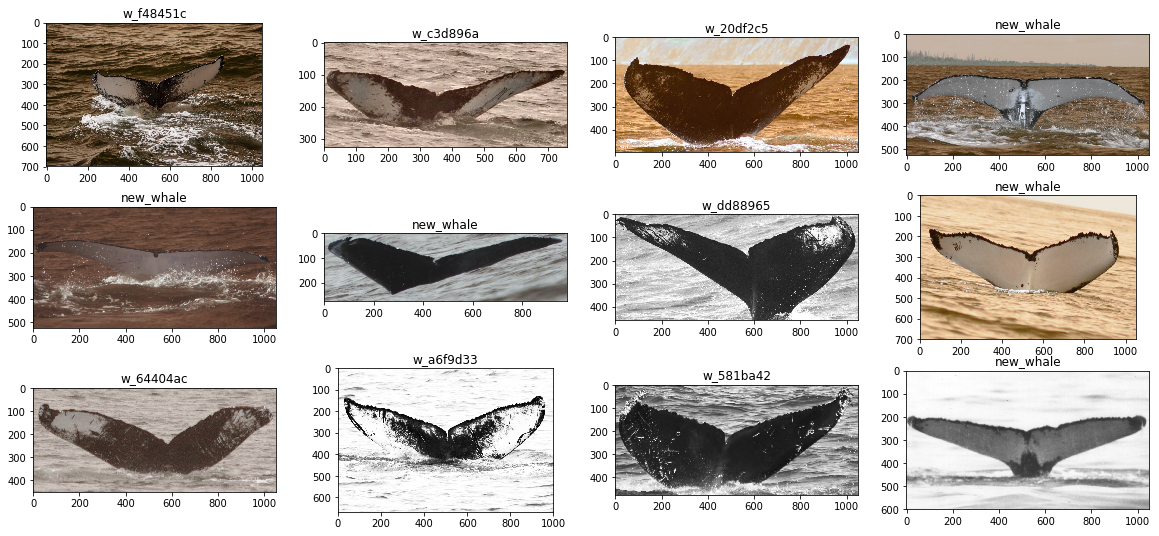

In [60]:
def display_samples(path, df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 3*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'Image']
        image_id = df.loc[i,'Id']
        img = cv2.imread(path+'/'+image_path)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
image_path = base_path+'/train'
display_samples(image_path,label_df)